# Military Power Clustering Project

<img src="military_power.jpg" alt="Military Power" style="width:100%;">
*Caption: by Author*

# PREFACE

Welcome to **"Military Power Clustering Project"**. In this project, we employ machine learning clustering techniques to analyze and categorize countries based on their Military Strength Power Index. By evaluating various military, financial, logistical,natural resources, man power and geographical parameters, we aim to uncover patterns in global defense capabilities and provide insights into military power distribution.

**Unsupervised Learning Method**

Unsupervised learning is a machine learning approach where algorithms analyze data without labeled outputs, allowing them to detect hidden patterns and structures within datasets. Unlike supervised learning, which relies on predefined categories, unsupervised methods explore intrinsic relationships in data and group similar entities based on shared characteristics.

**Clustering in Military Strength Analysis**

In your project, clustering is an unsupervised technique that categorizes countries based on their Military Strength Power Index. Instead of predefined classes, the model finds natural groupings among nations by analyzing military, financial, logistical, and geographical metrics.

**Key aspects of unsupervised clustering:**

 - Pattern Discovery: Identifies clusters of countries with similar defense capabilities without explicit labeling.
 - Dimensional Reduction: Helps simplify complex, high-dimensional military data while preserving key relationships.
 - Similarity Metrics: Uses techniques like Euclidean distance, cosine similarity, or Mahalanobis distance to determine how closely countries resemble one another.
 
**Common clustering algorithms that could be applied in your analysis include:**

 - K-Means: Groups countries into k clusters based on their military power similarity.
 - Hierarchical Clustering: Creates a tree structure showing hierarchical relationships between nations.


**NOTE:** This project assumes that you already know the basics of coding in Python and are familiar with model deployement as well as the theory behind Clustering. You can try more models and methods beside these to improve your model metrics.

# Roadmap For The Data

First of all, to observe the structure of the data, missing values and features that affect the clustering, you must use exploratory data analysis and data visualization techniques.

The purpose of clustering analysis is to cluster data with similar characteristics. You are asked to use the K-means and hierarchical algorithms to make cluster analysis. Also, the data you apply to the K-means algorithm must be scaled. In order to find the optimal number of clusters, you are asked to use the Elbow and silhouette analysis methods. 



# TASKS

**Exploratory Data Analysis**

 - Loading Dataset
 - Data Insights
 - Data Visualization
 - Dealing with Missing Values

**Data Pre-Processing**

 - Scaling

**Cluster Analysis**

 - Find the optimal number of clusters (k) using the elbow method for for K-means and hierarchical analysis.
 - Determine the clusters by using K-Means and hierarchical analysis.

# DATA SET

The data set is on https://data.world/vizzup/world-military-power/workspace/file?filename=World+military+power.xlsx
The data set has 138 samples. 
Explanation of Key Metrics:
 - **Military Strength Power Index:** A composite metric representing a country's overall military capability based on various defense-related indicators.
 - **Airforce Strength:** Evaluates air power through different aircraft types, including fighter jets, attack aircraft, transport planes, trainer aircraft, helicopters, and attack helicopters.
 - **Land Strength:** Measures ground force power via tanks, armored fighting vehicles (AFVs/APCs), self-propelled artillery, towed artillery, and rocket projector systems.
 - **Navy Strength:** Assesses maritime capabilities, including overall naval fleet strength, aircraft carriers, submarines, destroyers, and frigates.
 - **Finances:** Examines economic factors such as defense spending and external debt to assess a nation's financial capacity for sustaining military operations.
 - **Logistics:** Evaluates infrastructure availability, such as airport totals, which impact a country's ability to mobilize resources.
 - **Natural Resources:** Considers oil-related factors—production, consumption, and proven reserves—which influence a country’s ability to fuel military operations.
 - **Manpower:** Quantifies human resources via available manpower and total population, crucial for maintaining a robust defense force.
 - **Geography:** Assesses territorial attributes, including land area, coastline coverage, waterway availability, and border length, which influence strategic military advantages.

# Import Libraries

In [1]:
#pip install openpyxl

In [2]:
# importing libraries for data handling and analysis
import pandas as pd
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 150)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# importing libraries for warnings
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster._kmeans")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", message="The figure layout has changed to tight", category=UserWarning)
import os
os.environ["OMP_NUM_THREADS"] = "1"

# importing libraries for data visualisations
import plotly
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
%matplotlib inline
from plotly.offline import init_notebook_mode, iplot

# sklearn modules for preprocessing and clustering
from sklearn.preprocessing import StandardScaler, RobustScaler,MinMaxScaler
from sklearn.cluster import KMeans
from pyclustertend import hopkins
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering


# Ingest Data  

In [3]:
df = pd.read_excel("World military power.xlsx",header=[0,1]) # because of multyindex.
df.head()
# the smaller the power index, the more powerful a nation's conventional fighting capabilities.

2020 ranking                               Airforce Strength  \
  Military Strength Military Strength Power Index Aircraft Strength   
0       Afghanistan                        1.3444       Afghanistan   
1           Albania                        2.3137           Albania   
2           Algeria                        0.4659           Algeria   
3            Angola                        0.8379            Angola   
4         Argentina                        0.6521         Argentina   

                                                        \
  Aircraft Strength value Fighter/Interceptor Strength   
0                     260                  Afghanistan   
1                      19                      Albania   
2                     551                      Algeria   
3                     295                       Angola   
4                     227                    Argentina   

                                                               \
  Fighter/Interceptor Strength value Attack Aircraft Strength   
0                                  0              Afghanistan   
1                                  0                  Albania   
2                                103                  Algeria   
3                                 72                   Angola   
4                                 24                Argentina   

                                                                    \
  Attack Aircraft Strength value Transport Aircraft Fleet Strength   
0                             25                       Afghanistan   
1                              0                           Albania   
2                             22                           Algeria   
3                             18                            Angola   
4                              7                         Argentina   

                                                                  \
  Transport Aircraft Fleet Strength value Trainer Aircraft Fleet   
0                                      30            Afghanistan   
1                                       0                Albania   
2                                      59                Algeria   
3                                      30                 Angola   
4                                       9              Argentina   

                                                          \
  Trainer Aircraft Fleet value Helicopter Fleet Strength   
0                            0               Afghanistan   
1                            0                   Albania   
2                           87                   Algeria   
3                           47                    Angola   
4                           64                 Argentina   

                                                                    \
  Helicopter Fleet Strength value Attack Helicopter Fleet Strength   
0                             187                      Afghanistan   
1                              19                          Albania   
2                             257                          Algeria   
3                             126                           Angola   
4                             100                        Argentina   

                                         Land Strength                      \
  Attack Helicopter Fleet Strength value Tank Strength Tank Strength value   
0                                      0   Afghanistan                   0   
1                                      0       Albania                   0   
2                                     45       Algeria                 880   
3                                     15        Angola                 379   
4                                      0     Argentina                 370   

                                                                             \
  AFV/APC Strength AFV/APC Strength value Self-Propelled Artillery Strength   
0      Afghanistan                   1062                    

# EDA

## Implement basic steps to see how is your data looks like

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   (2020 ranking, Military Strength)                             138 non-null    object 
 1   (2020 ranking, Military Strength Power Index)                 138 non-null    float64
 2   (Airforce Strength, Aircraft Strength)                        138 non-null    object 
 3   (Airforce Strength, Aircraft Strength value)                  138 non-null    int64  
 4   (Airforce Strength, Fighter/Interceptor Strength)             138 non-null    object 
 5   (Airforce Strength, Fighter/Interceptor Strength value)       138 non-null    int64  
 6   (Airforce Strength, Attack Aircraft Strength)                 138 non-null    object 
 7   (Airforce Strength, Attack Aircraft Strength value)           138 non-n

In [5]:
df.shape

(138, 60)

In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum().any()

True

## Convert multi index columns to one level

In [8]:
df.columns # Due to the MultiIndex structure, the column headers appear as tuples.

MultiIndex([(     '2020 ranking',                       'Military Strength'),
            (     '2020 ranking',           'Military Strength Power Index'),
            ('Airforce Strength',                       'Aircraft Strength'),
            ('Airforce Strength',                 'Aircraft Strength value'),
            ('Airforce Strength',            'Fighter/Interceptor Strength'),
            ('Airforce Strength',      'Fighter/Interceptor Strength value'),
            ('Airforce Strength',                'Attack Aircraft Strength'),
            ('Airforce Strength',          'Attack Aircraft Strength value'),
            ('Airforce Strength',       'Transport Aircraft Fleet Strength'),
            ('Airforce Strength', 'Transport Aircraft Fleet Strength value'),
            ('Airforce Strength',                  'Trainer Aircraft Fleet'),
            ('Airforce Strength',            'Trainer Aircraft Fleet value'),
            ('Airforce Strength',               'Helicopter Flee

In [9]:
# To convert each level of the tuple to a string for iterating through the MultiIndex column headers.
df.columns = ['_'.join(tuple(map(str, t))) for t in df.columns.values]

In [10]:
df.columns 

Index(['2020 ranking_Military Strength',
       '2020 ranking_Military Strength Power Index',
       'Airforce Strength_Aircraft Strength',
       'Airforce Strength_Aircraft Strength value',
       'Airforce Strength_Fighter/Interceptor Strength',
       'Airforce Strength_Fighter/Interceptor Strength value',
       'Airforce Strength_Attack Aircraft Strength',
       'Airforce Strength_Attack Aircraft Strength value',
       'Airforce Strength_Transport Aircraft Fleet Strength',
       'Airforce Strength_Transport Aircraft Fleet Strength value',
       'Airforce Strength_Trainer Aircraft Fleet',
       'Airforce Strength_Trainer Aircraft Fleet value',
       'Airforce Strength_Helicopter Fleet Strength',
       'Airforce Strength_Helicopter Fleet Strength value',
       'Airforce Strength_Attack Helicopter Fleet Strength',
       'Airforce Strength_Attack Helicopter Fleet Strength value',
       'Land Strength_Tank Strength', 'Land Strength_Tank Strength value',
       'Land Strength

In [11]:
df.head()

,2020 ranking_Military Strength,2020 ranking_Military Strength Power Index,Airforce Strength_Aircraft Strength,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget,Finances_defense spending budget value,Finances_External Debt,Finances_External Debt value,Logistics_Airport Totals,Logistics_Airport Totals value,Natural resources_Oil Production,Natural resources_Oil Production value,Natural resources_Oil Consumption,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower,Manpower_Available Manpower value,Manpower_Total Population,Manpower_Total Population value,Geography_Total Square Land Area,Geography_Total Square Land Area value,Geography_Total Coastline Coverage,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage,Geography_Total Waterway Coverage value,Geography_Total Border Coverage,Geography_Total Border Coverage value
0,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,Afghanistan,0,Afghanistan,187,Afghanistan,0,Afghanistan,0,Afghanistan,1062,Afghanistan,0,Afghanistan,176,Afghanistan,50,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43,Afghanistan,0,Afghanistan,5500,Afghanistan,0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987.0
1,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,Albania,0,Albania,19,Albania,0,Albania,0,Albania,467,Albania,0,Albania,0,Albania,0,Albania,38.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4,Albania,16000,Albania,42500,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania,691.0
2,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,Algeria,87,Algeria,257,Algeria,45,Algeria,880,Algeria,7361,Algeria,320,Algeria,240,Algeria,316,Algeria,201.0,Algeria,0.0,Algeria,6.0,Algeria,0.0,Algeria,5.0,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,6734.0
3,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,Angola,47,Angola,126,Angola,15,Angola,379,Angola,595,Angola,28,Angola,357,Angola,115,Angola,57.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,"7,00,00,00,000",Angola,"42,08

## Selecting Value-Related Columns

In [12]:
# to find all occurrences of the pattern ".*value" within each column name. 
value_cols = [i[0] for i in df.columns.str.findall(".*value") if i !=[]]

value_cols

['Airforce Strength_Aircraft Strength value',
 'Airforce Strength_Fighter/Interceptor Strength value',
 'Airforce Strength_Attack Aircraft Strength value',
 'Airforce Strength_Transport Aircraft Fleet Strength value',
 'Airforce Strength_Trainer Aircraft Fleet value',
 'Airforce Strength_Helicopter Fleet Strength value',
 'Airforce Strength_Attack Helicopter Fleet Strength value',
 'Land Strength_Tank Strength value',
 'Land Strength_AFV/APC Strength value',
 'Land Strength_Self-Propelled Artillery Strength value',
 'Land Strength_Towed Artillery Strength value',
 'Land Strength_Rocket Projector Strength value',
 'Navy Strength_Navy Fleet Strengths value',
 'Navy Strength_Aircraft Carrier Fleet Strength value',
 'Navy Strength_Submarine Fleet Strength value',
 'Navy Strength_Destroyer Fleet Strength value',
 'Navy Strength_Frigate Fleet Strength value',
 'Finances_defense spending budget value',
 'Finances_External Debt value',
 'Logistics_Airport Totals value',
 'Natural resources_Oil

In [13]:
# Create a copy of the original DataFrame to avoid modifying it directly if you don't want to
value_df = df.copy()

# Select the "value" columns
value_df = value_df[value_cols]

# Insert the "country" column
value_df.insert(0, "country", df["2020 ranking_Military Strength"])

# Insert the "Military Strength Power Index" column
value_df.insert(1, "Military Strength Power Index", df["2020 ranking_Military Strength Power Index"])

# Now, if you want to rename 'value_df' back to 'df':
df = value_df.copy() # Use .copy() to avoid potential SettingWithCopyWarning
df.head()
#We've gotten rid of unnecessary, repeated columns.

,country,Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,Geography_Total Square Land Area value,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage value,Geography_Total Border Coverage value
0,Afghanistan,1.3444,260,0,25,30,0,187,0,0,1062,0,176,50,0.0,0.0,0.0,0.0,0.0,"12,00,00,00,000","2,84,00,00,000",43,0,5500,0,"1,43,25,743","3,49,40,837","6,52,230",0,1200,5987.0
1,Albania,2.3137,19,0,0,0,0,19,0,0,467,0,0,0,38.0,0.0,0.0,0.0,0.0,"25,00,00,000","9,50,50,00,000",4,16000,42500,"16,83,00,000","15,19,438","30,57,220",28748,362,41,691.0
2,Algeria,0.4659,551,103,22,59,87,257,45,880,7361,320,240,316,201.0,0.0,6.0,0.0,5.0,"13,00,00,00,000","6,26,00,00,000",157,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998,0,6734.0
3,Angola,0.8379,295,72,18,30,47,126,15,379,595,28,357,115,57.0,0.0,0.0,0.0,0.0,"7,00,00,00,000","42,08,00,00,000",176,"16,66,000",82300,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600,1300,5369.0
4,Argentina,0.6521,227,24,7,9,64,100,0,370,739,83,172,26,49.0,0.0,2.0,4.0,0.0,"4,20,00,00,000","2,14,90,00,00,000",1138,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989,11000,11968.0


## Check for missing values 

In [14]:
df.isnull().sum().sort_values(ascending=False)

Geography_Total Coastline Coverage value                     29
Navy Strength_Aircraft Carrier Fleet Strength value          23
Navy Strength_Frigate Fleet Strength value                   23
Navy Strength_Destroyer Fleet Strength value                 23
Navy Strength_Submarine Fleet Strength value                 23
Navy Strength_Navy Fleet Strengths value                     14
Geography_Total Border Coverage value                         9
Airforce Strength_Helicopter Fleet Strength value             0
Airforce Strength_Attack Helicopter Fleet Strength value      0
Geography_Total Waterway Coverage value                       0
Airforce Strength_Aircraft Strength value                     0
Geography_Total Square Land Area value                        0
Manpower_Total Population value                               0
Manpower_Available Manpower value                             0
Natural resources_Proven Oil Reserves value                   0
Natural resources_Oil Consumption value 

In [15]:
df.isnull().melt(value_name="missing")#unpivoting the table from a wide format to a long format

,variable,missing
0,country,False
1,country,False
2,country,False
3,country,False
4,country,False
...,...,...
4273,Geography_Total Border Coverage value,False
4274,Geography_Total Border Coverage value,False
4275,Geography_Total Border Coverage value,False
4276,Geography_Total Border Coverage value,False


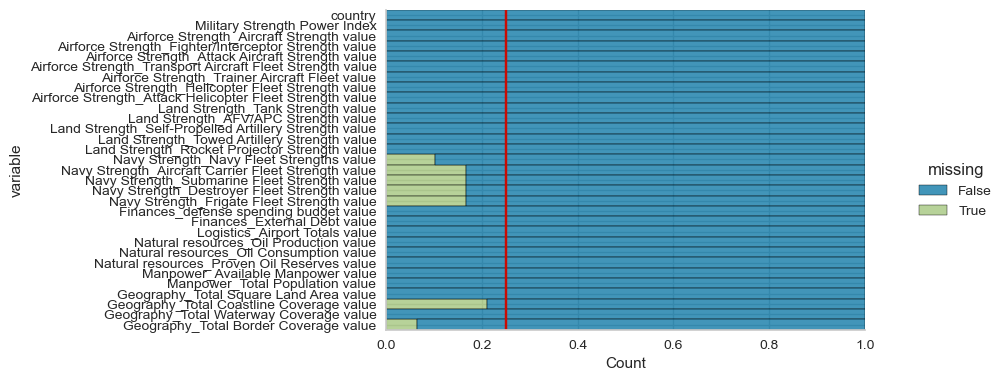

In [16]:
sns.displot(
    data=df.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    height=4,
    aspect=1.5
)
plt.axvline(0.25, color="r")
plt.subplots_adjust(left=0.1, right=0.8, bottom=0.1, top=0.9) # Increased left margin
plt.show()

In [17]:
with pd.option_context('display.max_columns', None):
    display(df[df["Geography_Total Coastline Coverage value"].isna()])
# to inspect the rows where the "Geography_Total Coastline Coverage" column has missing values or landlocked countries.

,country,Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,Geography_Total Square Land Area value,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage value,Geography_Total Border Coverage value
5,Armenia,2.1251,64,0,9,3,13,37,20,110,748,38,150,68,0.0,NaN,NaN,NaN,NaN,"1,38,50,00,000","10,41,00,00,000",11,0,47500,0,"16,96,085","30,38,217",29743,NaN,0,1570.0
7,Austria,0.9568,120,15,0,11,32,62,0,56,467,33,0,0,0.0,NaN,NaN,NaN,NaN,"3,38,00,00,000","6,30,80,00,00,000",52,14260,"2,15,000","4,30,00,000","40,17,691","87,93,370",83871,NaN,0,2524.0
11,Belarus,0.8179,202,39,68,4,28,63,21,532,1560,482,228,238,0.0,NaN,NaN,NaN,NaN,"62,37,02,800","39,92,00,00,000",65,32000,"1,90,000","19,80,00,000","49,82,905","95,27,543","2,07,600",NaN,2500,3599.0
13,Bhutan,10.1681,2,0,0,0,0,2,0,0,27,0,0,0,0.0,NaN,NaN,NaN,NaN,"2,51,20,000","2,67,10,00,000",2,0,2000,0,"1,76,808","7,66,397",38394,NaN,0,1136.0
14,Bolivia,0.9942,69,0,0,14,23,38,0,54,137,0,86,0,173.0,0.0,0.0,0.0,0.0,"66,00,00,000","12,81,00,00,000",855,59330,60000,"21,15,00,000","50,75,416","1,13,06,341","10,98,581",NaN,10000,7252.0
16,Botswana,2.0582,45,10,0,11,8,16,0,55,245,0,30,20,NaN,NaN,NaN,NaN,NaN,"45,00,00,000","2,18,70,00,000",74,0,16500,0,"9,62,617","22,49,104","5,81,730",NaN,0,4347.0
19,Burkina Faso,1.9009,16,0,3,1,4,8,2,0,350,0,0,0,NaN,NaN,NaN,NaN,NaN,"13,00,00,000","3,05,60,00,000",23,0,10500,0,"78,00,000","1,97,42,715","2,74,200",NaN,0,3611.0
23,Central African Republic,3.2889,3,0,0,2,0,1,0,4,55,0,20,0,NaN,NaN,NaN,NaN,NaN,"2,00,00,000","77,99,00,000",39,0,4500,0,"23,48,581","57,45,062","6,22,984",NaN,2800,5920.0
24,Chad,1.6383,35,0,6,6,4,17,3,60,372,10,51,10,NaN,NaN,NaN,NaN,NaN,"20,00,00,000","1,72,40,00,000",59,"1,28,000","1,00,000","1,50,00,00,000","60,30,834","1,58,33,116","12,84,000",NaN,0,6406.0
30,Czechia,0.5531,95,12,16,8,15,44,15,116,682,86,85,0,NaN,NaN,NaN,NaN,NaN,"2,96,90,00,000","2,05,20,00,00,000",128,2000,"2,00,000","1,50,00,000","50,11,174","1,06,86,269",78867,NaN,664,2046.0


## Deal with missing values 
* Hint-1, use wikipedia to fill in missing values ​​comparing with similar countries
* Hint-2, Georeferences of countries can help you

In [18]:
df.loc[df["Geography_Total Coastline Coverage value"].isnull(), ['country',
                                                                             'Navy Strength_Navy Fleet Strengths value',
                                                                             'Navy Strength_Aircraft Carrier Fleet Strength value',
                                                                             'Navy Strength_Submarine Fleet Strength value',
                                                                             'Navy Strength_Destroyer Fleet Strength value',
                                                                             'Navy Strength_Frigate Fleet Strength value',
                                                                             'Geography_Total Waterway Coverage value']]

,country,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Geography_Total Waterway Coverage value
5,Armenia,0.0,NaN,NaN,NaN,NaN,0
7,Austria,0.0,NaN,NaN,NaN,NaN,0
11,Belarus,0.0,NaN,NaN,NaN,NaN,2500
13,Bhutan,0.0,NaN,NaN,NaN,NaN,0
14,Bolivia,173.0,0.0,0.0,0.0,0.0,10000
16,Botswana,NaN,NaN,NaN,NaN,NaN,0
19,Burkina Faso,NaN,NaN,NaN,NaN,NaN,0
23,Central African Republic,NaN,NaN,NaN,NaN,NaN,2800
24,Chad,NaN,NaN,NaN,NaN,NaN,0
30,Czechia,NaN,NaN,NaN,NaN,NaN,664


In [19]:
df.loc[df["country"] == "South Sudan",
             ['country',
             'Navy Strength_Navy Fleet Strengths value',
             'Navy Strength_Aircraft Carrier Fleet Strength value',
             'Navy Strength_Submarine Fleet Strength value',
             'Navy Strength_Destroyer Fleet Strength value',
             'Navy Strength_Frigate Fleet Strength value',
           ]] 

,country,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value
111,South Sudan,0.0,2.0,22.0,12.0,18.0


There's a very interesting situation regarding **"Navy Strength Values" of South Sudan**. Because it has no  **"Coastline Coverage Value".** So let's fix.

In [20]:
df.loc[df["country"] == "South Sudan", 'Navy Strength_Aircraft Carrier Fleet Strength value'] = 0
df.loc[df["country"] == "South Sudan", 'Navy Strength_Submarine Fleet Strength value'] = 0
df.loc[df["country"] == "South Sudan", 'Navy Strength_Destroyer Fleet Strength value'] = 0
df.loc[df["country"] == "South Sudan", 'Navy Strength_Frigate Fleet Strength value'] = 0

In [21]:
df.loc[
    
    df["Geography_Total Coastline Coverage value"].isnull(),
    
    ['Navy Strength_Navy Fleet Strengths value',
     'Navy Strength_Aircraft Carrier Fleet Strength value',
     'Navy Strength_Submarine Fleet Strength value',
     'Navy Strength_Destroyer Fleet Strength value',
     'Navy Strength_Frigate Fleet Strength value']
    
    ] = 0

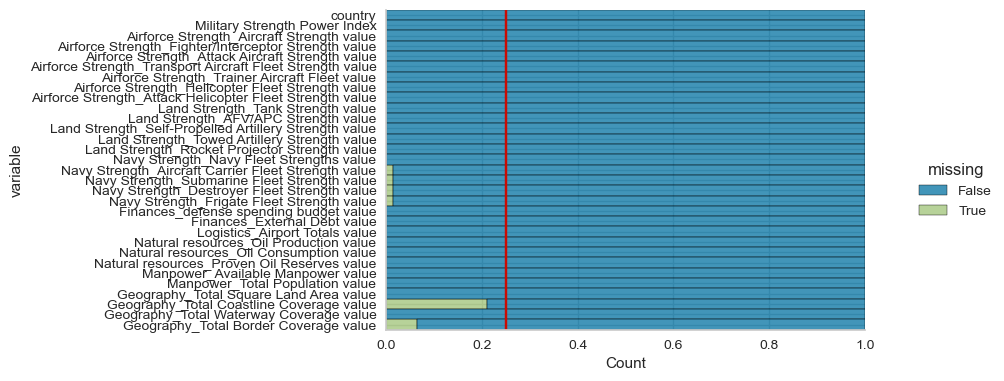

In [22]:
sns.displot(
    data=df.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    height=4,
    aspect=1.5
)
plt.axvline(0.25, color="r")
plt.subplots_adjust(left=0.1, right=0.8, bottom=0.1, top=0.9) # Increased left margin
plt.show()

In [23]:
df.loc[df['Navy Strength_Aircraft Carrier Fleet Strength value'].isnull()|
             df['Navy Strength_Submarine Fleet Strength value'].isnull()|
             df['Navy Strength_Destroyer Fleet Strength value'].isnull()|
             df['Navy Strength_Frigate Fleet Strength value'].isnull()] 

,country,Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,Geography_Total Square Land Area value,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage value,Geography_Total Border Coverage value
110,South Korea,0.1509,1649,414,71,41,298,803,112,2614,14000,3040,3854,575,234.0,NaN,NaN,NaN,NaN,"44,00,00,00,000","3,84,60,00,00,000",111,0,"28,00,000",0,"2,57,09,049","5,14,18,097",99720,2413,1600,237.0
132,Uzbekistan,0.8086,185,66,20,18,2,79,25,420,1215,137,0,98,0.0,NaN,NaN,NaN,NaN,"97,50,00,000","16,90,00,00,000",53,46070,"1,42,000","59,40,00,000","1,59,12,566","3,00,23,709","4,47,400",420,1100,6893.0


In [24]:
df.loc[df["country"] == "Uzbekistan",
            ['Navy Strength_Navy Fleet Strengths value',
             'Navy Strength_Aircraft Carrier Fleet Strength value',
             'Navy Strength_Submarine Fleet Strength value',
             'Navy Strength_Destroyer Fleet Strength value',
             'Navy Strength_Frigate Fleet Strength value',
           ]] 

,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value
132,0.0,NaN,NaN,NaN,NaN


In [25]:
df.loc[df["country"] == "Uzbekistan",
            ['Navy Strength_Navy Fleet Strengths value',
             'Navy Strength_Aircraft Carrier Fleet Strength value',
             'Navy Strength_Submarine Fleet Strength value',
             'Navy Strength_Destroyer Fleet Strength value',
             'Navy Strength_Frigate Fleet Strength value',
           ]] = 0

In [26]:
df.loc[df["country"] == "South Korea",
            ['Navy Strength_Navy Fleet Strengths value',
             'Navy Strength_Aircraft Carrier Fleet Strength value',
             'Navy Strength_Submarine Fleet Strength value',
             'Navy Strength_Destroyer Fleet Strength value',
             'Navy Strength_Frigate Fleet Strength value',
           ]] 

,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value
110,234.0,NaN,NaN,NaN,NaN


In [27]:
df.loc[((df['Navy Strength_Navy Fleet Strengths value'] > 200) & 
             (df['Navy Strength_Navy Fleet Strengths value'] < 250)),
            ['country',
             'Navy Strength_Navy Fleet Strengths value',
             'Navy Strength_Aircraft Carrier Fleet Strength value',
             'Navy Strength_Submarine Fleet Strength value',
             'Navy Strength_Destroyer Fleet Strength value',
             'Navy Strength_Frigate Fleet Strength value',
           ]] 

,country,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value
2,Algeria,201.0,0.0,6.0,0.0,5.0
39,Finland,246.0,0.0,0.0,0.0,0.0
55,Italy,249.0,2.0,8.0,4.0,12.0
110,South Korea,234.0,NaN,NaN,NaN,NaN


In [28]:
df.loc[df["country"] == "France",
             ['country',
             'Navy Strength_Navy Fleet Strengths value',
             'Navy Strength_Aircraft Carrier Fleet Strength value',
             'Navy Strength_Submarine Fleet Strength value',
             'Navy Strength_Destroyer Fleet Strength value',
             'Navy Strength_Frigate Fleet Strength value',
           ]] 

,country,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value
40,France,180.0,4.0,9.0,11.0,11.0


In [29]:
df.loc[df["country"] == "South Korea"]

,country,Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,Geography_Total Square Land Area value,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage value,Geography_Total Border Coverage value
110,South Korea,0.1509,1649,414,71,41,298,803,112,2614,14000,3040,3854,575,234.0,NaN,NaN,NaN,NaN,"44,00,00,00,000","3,84,60,00,00,000",111,0,"28,00,000",0,"2,57,09,049","5,14,18,097",99720,2413,1600,237.0


In [30]:
# All the numbers derived from South Korea Navy https://www.globalfirepower.com/
df.loc[df["country"] == "South Korea",'Navy Strength_Aircraft Carrier Fleet Strength value'] = 0
df.loc[df["country"] == "South Korea",'Navy Strength_Submarine Fleet Strength value'] = 19
df.loc[df["country"] == "South Korea",'Navy Strength_Destroyer Fleet Strength value'] = 12
df.loc[df["country"] == "South Korea",'Navy Strength_Frigate Fleet Strength value'] = 12

In [31]:
df.loc[df["country"] == "South Korea"]

,country,Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,Geography_Total Square Land Area value,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage value,Geography_Total Border Coverage value
110,South Korea,0.1509,1649,414,71,41,298,803,112,2614,14000,3040,3854,575,234.0,0.0,19.0,12.0,12.0,"44,00,00,00,000","3,84,60,00,00,000",111,0,"28,00,000",0,"2,57,09,049","5,14,18,097",99720,2413,1600,237.0


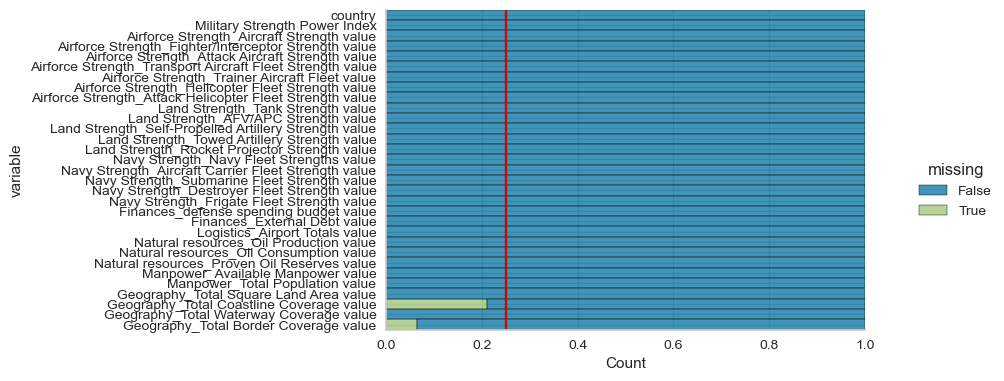

In [32]:
sns.displot(
    data=df.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    height=4,
    aspect=1.5
)
plt.axvline(0.25, color="r")
plt.subplots_adjust(left=0.1, right=0.8, bottom=0.1, top=0.9) # Increased left margin
plt.show()

In [33]:
df.loc[df['Geography_Total Coastline Coverage value'].isnull()]

,country,Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,Geography_Total Square Land Area value,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage value,Geography_Total Border Coverage value
5,Armenia,2.1251,64,0,9,3,13,37,20,110,748,38,150,68,0.0,0.0,0.0,0.0,0.0,"1,38,50,00,000","10,41,00,00,000",11,0,47500,0,"16,96,085","30,38,217",29743,NaN,0,1570.0
7,Austria,0.9568,120,15,0,11,32,62,0,56,467,33,0,0,0.0,0.0,0.0,0.0,0.0,"3,38,00,00,000","6,30,80,00,00,000",52,14260,"2,15,000","4,30,00,000","40,17,691","87,93,370",83871,NaN,0,2524.0
11,Belarus,0.8179,202,39,68,4,28,63,21,532,1560,482,228,238,0.0,0.0,0.0,0.0,0.0,"62,37,02,800","39,92,00,00,000",65,32000,"1,90,000","19,80,00,000","49,82,905","95,27,543","2,07,600",NaN,2500,3599.0
13,Bhutan,10.1681,2,0,0,0,0,2,0,0,27,0,0,0,0.0,0.0,0.0,0.0,0.0,"2,51,20,000","2,67,10,00,000",2,0,2000,0,"1,76,808","7,66,397",38394,NaN,0,1136.0
14,Bolivia,0.9942,69,0,0,14,23,38,0,54,137,0,86,0,0.0,0.0,0.0,0.0,0.0,"66,00,00,000","12,81,00,00,000",855,59330,60000,"21,15,00,000","50,75,416","1,13,06,341","10,98,581",NaN,10000,7252.0
16,Botswana,2.0582,45,10,0,11,8,16,0,55,245,0,30,20,0.0,0.0,0.0,0.0,0.0,"45,00,00,000","2,18,70,00,000",74,0,16500,0,"9,62,617","22,49,104","5,81,730",NaN,0,4347.0
19,Burkina Faso,1.9009,16,0,3,1,4,8,2,0,350,0,0,0,0.0,0.0,0.0,0.0,0.0,"13,00,00,000","3,05,60,00,000",23,0,10500,0,"78,00,000","1,97,42,715","2,74,200",NaN,0,3611.0
23,Central African Republic,3.2889,3,0,0,2,0,1,0,4,55,0,20,0,0.0,0.0,0.0,0.0,0.0,"2,00,00,000","77,99,00,000",39,0,4500,0,"23,48,581","57,45,062","6,22,984",NaN,2800,5920.0
24,Chad,1.6383,35,0,6,6,4,17,3,60,372,10,51,10,0.0,0.0,0.0,0.0,0.0,"20,00,00,000","1,72,40,00,000",59,"1,28,000","1,00,000","1,50,00,00,000","60,30,834","1,58,33,116","12,84,000",NaN,0,6406.0
30,Czechia,0.5531,95,12,16,8,15,44,15,116,682,86,85,0,0.0,0.0,0.0,0.0,0.0,"2,96,90,00,000","2,05,20,00,00,000",128,2000,"2,00,000","1,50,00,000","50,11,174","1,06,86,269",78867,NaN,664,2046.0


In [34]:
df.loc[df['Geography_Total Coastline Coverage value'].isnull(), 
                      'Geography_Total Coastline Coverage value']  = 0 

In [35]:
df.loc[df['Geography_Total Border Coverage value'].isnull()]

,country,Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,Geography_Total Square Land Area value,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage value,Geography_Total Border Coverage value
6,Australia,0.3225,464,82,6,38,174,133,22,59,3051,0,54,0,48.0,2.0,6.0,2.0,8.0,"26,30,00,00,000","17,14,00,00,00,000",480,"2,63,000","10,05,000","1,82,10,00,000","1,08,08,002","2,34,70,145","77,41,220",25760,2000,NaN
9,Bahrain,1.8547,109,17,0,2,37,65,22,180,843,33,26,17,39.0,0.0,0.0,0.0,1.0,"1,41,50,00,000","52,15,00,00,000",4,45000,55000,"12,46,00,000","8,06,505","14,22,659",760,161,0,NaN
57,Japan,0.1501,1561,279,12,60,427,637,119,1004,3130,238,500,99,155.0,4.0,20.0,40.0,0.0,"49,00,00,00,000","32,40,00,00,00,000",175,3841,"40,00,000","4,41,20,000","5,38,73,803","12,61,68,156","3,77,915",29751,1770,NaN
69,Madagascar,3.0869,6,0,0,0,0,6,0,12,103,0,25,0,8.0,0.0,0.0,0.0,0.0,"11,50,00,000","4,08,90,00,000",83,0,18500,0,"1,01,45,026","2,56,83,610","5,87,040",4828,600,NaN
83,New Zealand,1.3684,48,0,0,7,13,22,0,0,200,0,24,0,11.0,0.0,0.0,0.0,2.0,"4,30,00,00,000","91,62,00,00,000",123,31480,"1,50,000","5,69,00,000","21,15,989","45,45,627","2,67,710",15134,0,NaN
95,Philippines,0.7852,171,0,19,23,24,97,0,7,513,0,286,0,103.0,0.0,0.0,0.0,2.0,"3,47,00,00,000","76,18,00,00,000",247,15000,"3,20,000","13,85,00,000","5,18,87,757","10,58,93,381","3,00,000",36289,3219,NaN
105,Singapore,0.7966,235,100,0,9,36,77,17,180,3000,48,77,24,40.0,0.0,0.0,0.0,6.0,"11,20,00,00,000","5,66,10,00,00,000",9,0,"13,40,000",0,"40,17,314","59,95,991",697,193,10,NaN
113,Sri Lanka,1.4661,77,0,0,15,6,54,9,202,570,0,209,22,40.0,0.0,0.0,0.0,0.0,"2,50,00,00,000","51,72,00,00,000",19,0,90000,0,"1,09,27,071","2,25,76,592",65610,1340,160,NaN
119,Taiwan,0.4008,744,289,0,19,207,210,91,1180,2000,482,1160,115,117.0,0.0,4.0,4.0,22.0,"10,72,50,00,000","1,81,90,00,00,000",37,196,"10,32,000","23,80,000","1,21,96,809","2,35,45,963",35980,1566,3720,NaN


In [36]:
df.loc[df['Geography_Total Border Coverage value'].isnull(), 
                      'Geography_Total Border Coverage value' ] = 0

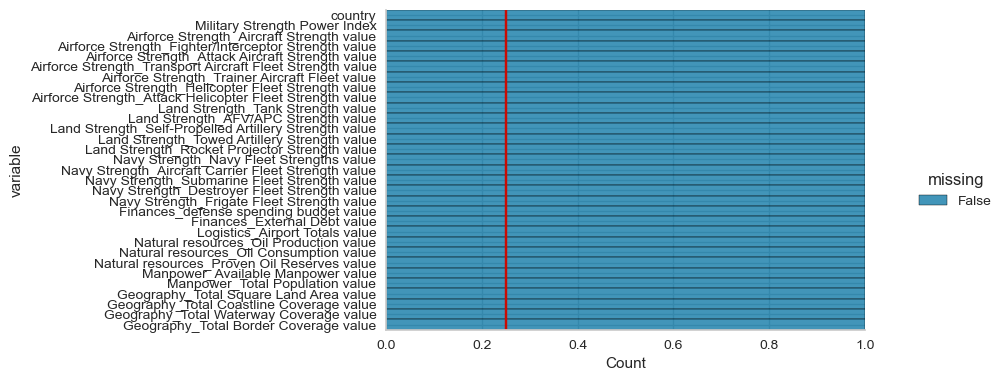

In [37]:
sns.displot(
    data=df.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    height=4,
    aspect=1.5
)
plt.axvline(0.25, color="r")
plt.subplots_adjust(left=0.1, right=0.8, bottom=0.1, top=0.9) # Increased left margin
plt.show()

In [38]:
df.reset_index(drop=True,inplace=True)

## Fix the dtypes

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   country                                                    138 non-null    object 
 1   Military Strength Power Index                              138 non-null    float64
 2   Airforce Strength_Aircraft Strength value                  138 non-null    int64  
 3   Airforce Strength_Fighter/Interceptor Strength value       138 non-null    int64  
 4   Airforce Strength_Attack Aircraft Strength value           138 non-null    int64  
 5   Airforce Strength_Transport Aircraft Fleet Strength value  138 non-null    int64  
 6   Airforce Strength_Trainer Aircraft Fleet value             138 non-null    int64  
 7   Airforce Strength_Helicopter Fleet Strength value          138 non-null    int64  
 8   Airforce S

In [40]:
df.select_dtypes("object")

,country,Finances_defense spending budget value,Finances_External Debt value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,Geography_Total Square Land Area value,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage value
0,Afghanistan,"12,00,00,00,000","2,84,00,00,000",0,5500,0,"1,43,25,743","3,49,40,837","6,52,230",0,1200
1,Albania,"25,00,00,000","9,50,50,00,000",16000,42500,"16,83,00,000","15,19,438","30,57,220",28748,362,41
2,Algeria,"13,00,00,00,000","6,26,00,00,000","13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998,0
3,Angola,"7,00,00,00,000","42,08,00,00,000","16,66,000",82300,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600,1300
4,Argentina,"4,20,00,00,000","2,14,90,00,00,000","4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989,11000
5,Armenia,"1,38,50,00,000","10,41,00,00,000",0,47500,0,"16,96,085","30,38,217",29743,0,0
6,Australia,"26,30,00,00,000","17,14,00,00,00,000","2,63,000","10,05,000","1,82,10,00,000","1,08,08,002","2,34,70,145","77,41,220",25760,2000
7,Austria,"3,38,00,00,000","6,30,80,00,00,000",14260,"2,15,000","4,30,00,000","40,17,691","87,93,370",83871,0,0
8,Azerbaijan,"2,80,50,00,000","17,41,00,00,000","7,89,300","1,80,000","7,00,00,00,000","50,42,346","1,00,46,516",86600,713,0
9,Bahrain,"1,41,50,00,000","52,15,00,00,000",45000,55000,"12,46,00,000","8,06,505","14,22,659",760,161,0


In [41]:
df.select_dtypes("object")["Natural resources_Oil Production value"].str.replace(",","")
#cleaning numerical data that might be stored as strings

0           NaN
1           NaN
2       1306000
3       1666000
4        479400
5           NaN
6        263000
7           NaN
8        789300
9           NaN
10          NaN
11          NaN
12          NaN
13          NaN
14          NaN
15          NaN
16          NaN
17      2622000
18          NaN
19          NaN
20          NaN
21          NaN
22      3977000
23          NaN
24       128000
25          NaN
26      3838000
27       853600
28          NaN
29          NaN
30          NaN
31          NaN
32       137100
33          NaN
34       531300
35       589400
36          NaN
37          NaN
38          NaN
39          NaN
40          NaN
41       198800
42          NaN
43          NaN
44       151000
45          NaN
46          NaN
47          NaN
48          NaN
49       733900
50       801700
51      4469000
52      4454000
53          NaN
54          NaN
55          NaN
56          NaN
57          NaN
58          NaN
59      1777000
60          NaN
61      2753000
62      

In [42]:
columns = df.select_dtypes("object").columns
columns

Index(['country', 'Finances_defense spending budget value',
       'Finances_External Debt value',
       'Natural resources_Oil Production value',
       'Natural resources_Oil Consumption value',
       'Natural resources_Proven Oil Reserves value',
       'Manpower_Available Manpower value', 'Manpower_Total Population value',
       'Geography_Total Square Land Area value',
       'Geography_Total Coastline Coverage value',
       'Geography_Total Waterway Coverage value'],
      dtype='object')

In [43]:
for col in columns[1:]:
    df[col]  = df[col].astype("str")
    df[col]  = df.select_dtypes("object")[col].str.replace(',','')
    df[col]  = df[col].astype("float")
    # to clean and convert a range of columns to numerical (float) format.

In [44]:
 df.select_dtypes("object")

,country
0,Afghanistan
1,Albania
2,Algeria
3,Angola
4,Argentina
5,Armenia
6,Australia
7,Austria
8,Azerbaijan
9,Bahrain


## Drop the features that not affect military power
* Hint-1,  Georeferences not proper features

In [45]:
df.columns

Index(['country', 'Military Strength Power Index',
       'Airforce Strength_Aircraft Strength value',
       'Airforce Strength_Fighter/Interceptor Strength value',
       'Airforce Strength_Attack Aircraft Strength value',
       'Airforce Strength_Transport Aircraft Fleet Strength value',
       'Airforce Strength_Trainer Aircraft Fleet value',
       'Airforce Strength_Helicopter Fleet Strength value',
       'Airforce Strength_Attack Helicopter Fleet Strength value',
       'Land Strength_Tank Strength value',
       'Land Strength_AFV/APC Strength value',
       'Land Strength_Self-Propelled Artillery Strength value',
       'Land Strength_Towed Artillery Strength value',
       'Land Strength_Rocket Projector Strength value',
       'Navy Strength_Navy Fleet Strengths value',
       'Navy Strength_Aircraft Carrier Fleet Strength value',
       'Navy Strength_Submarine Fleet Strength value',
       'Navy Strength_Destroyer Fleet Strength value',
       'Navy Strength_Frigate Flee

In [46]:
df.drop(['Geography_Total Square Land Area value',
               'Geography_Total Coastline Coverage value',
               'Geography_Total Waterway Coverage value',
               'Geography_Total Border Coverage value'],axis=1,inplace=True)

## Visualy inspect the some features

In [47]:
fig = px.bar(df,x= "country" , y = value_df["Airforce Strength_Aircraft Strength value"])

In [48]:
init_notebook_mode(connected=True)

In [49]:
iplot(fig)

In [50]:
fig = px.box(df, x = value_df["Airforce Strength_Aircraft Strength value"],
             hover_name=value_df["country"])

In [51]:
iplot(fig)

In [52]:
fig = px.bar(df,x= "country" , y = value_df['Navy Strength_Navy Fleet Strengths value'])

In [53]:
iplot(fig)

In [54]:
fig = px.box(df, x = value_df["Navy Strength_Navy Fleet Strengths value"],
             hover_name=value_df["country"])

In [55]:
iplot(fig)

In [56]:
fig = px.bar(df,x= "country" , y = value_df['Land Strength_Tank Strength value'])

In [57]:
iplot(fig)

In [58]:
fig = px.box(df, x = value_df["Land Strength_Tank Strength value"],
             hover_name=value_df["country"])

In [59]:
iplot(fig)

In [60]:
fig = go.Figure()
fig.add_trace(go.Box(x=df["Finances_External Debt value"],
              hovertext=df["country"],
              name = "Finances_External Debt value")
             )
fig.add_trace(go.Box(x=df["Finances_defense spending budget value"],
                     hovertext=df["country"],
                    name = "Finances_defense spending budget value")
             )
iplot(fig)

## Decriptive statistics

In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Military Strength Power Index,138.0,1.460716e+00,1.324018e+00,6.060000e-02,5.748000e-01,1.034100e+00,2.021525e+00,1.016810e+01
Airforce Strength_Aircraft Strength value,138.0,3.884710e+02,1.231982e+03,0.000000e+00,3.300000e+01,1.110000e+02,2.902500e+02,1.326400e+04
Airforce Strength_Fighter/Interceptor Strength value,138.0,8.156522e+01,2.303248e+02,0.000000e+00,0.000000e+00,1.700000e+01,6.050000e+01,2.085000e+03
Airforce Strength_Attack Aircraft Strength value,138.0,2.576087e+01,9.452822e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.575000e+01,7.420000e+02
Airforce Strength_Transport Aircraft Fleet Strength value,138.0,3.023188e+01,9.233044e+01,0.000000e+00,3.000000e+00,9.000000e+00,2.600000e+01,9.450000e+02
Airforce Strength_Trainer Aircraft Fleet value,138.0,8.283333e+01,2.408037e+02,0.000000e+00,4.250000e+00,2.600000e+01,7.925000e+01,2.643000e+03
Airforce Strength_Helicopter Fleet Strength value,138.0,1.540652e+02,5.201836e+02,0.000000e+00,1.525000e+01,4.400000e+01,1.267500e+02,5.768000e+03
Airforce Strength_Attack Helicopter Fleet Strength value,138.0,2.562319e+01,9.732609e+01,0.000000e+00,0.000000e+00,2.000000e+00,1.775000e+01,9.670000e+02
Land Strength_Tank Strength value,138.0,6.465652e+02,1.515464e+03,0.000000e+00,1.925000e+01,1.530000e+02,4.362500e+02,1.295000e+04
Land Strength_AFV/APC Strength value,138.0,2.485696e+03,5.410546e+03,0.000000e+00,2.502500e+02,7.345000e+02,2.000000e+03,3.925300e+04


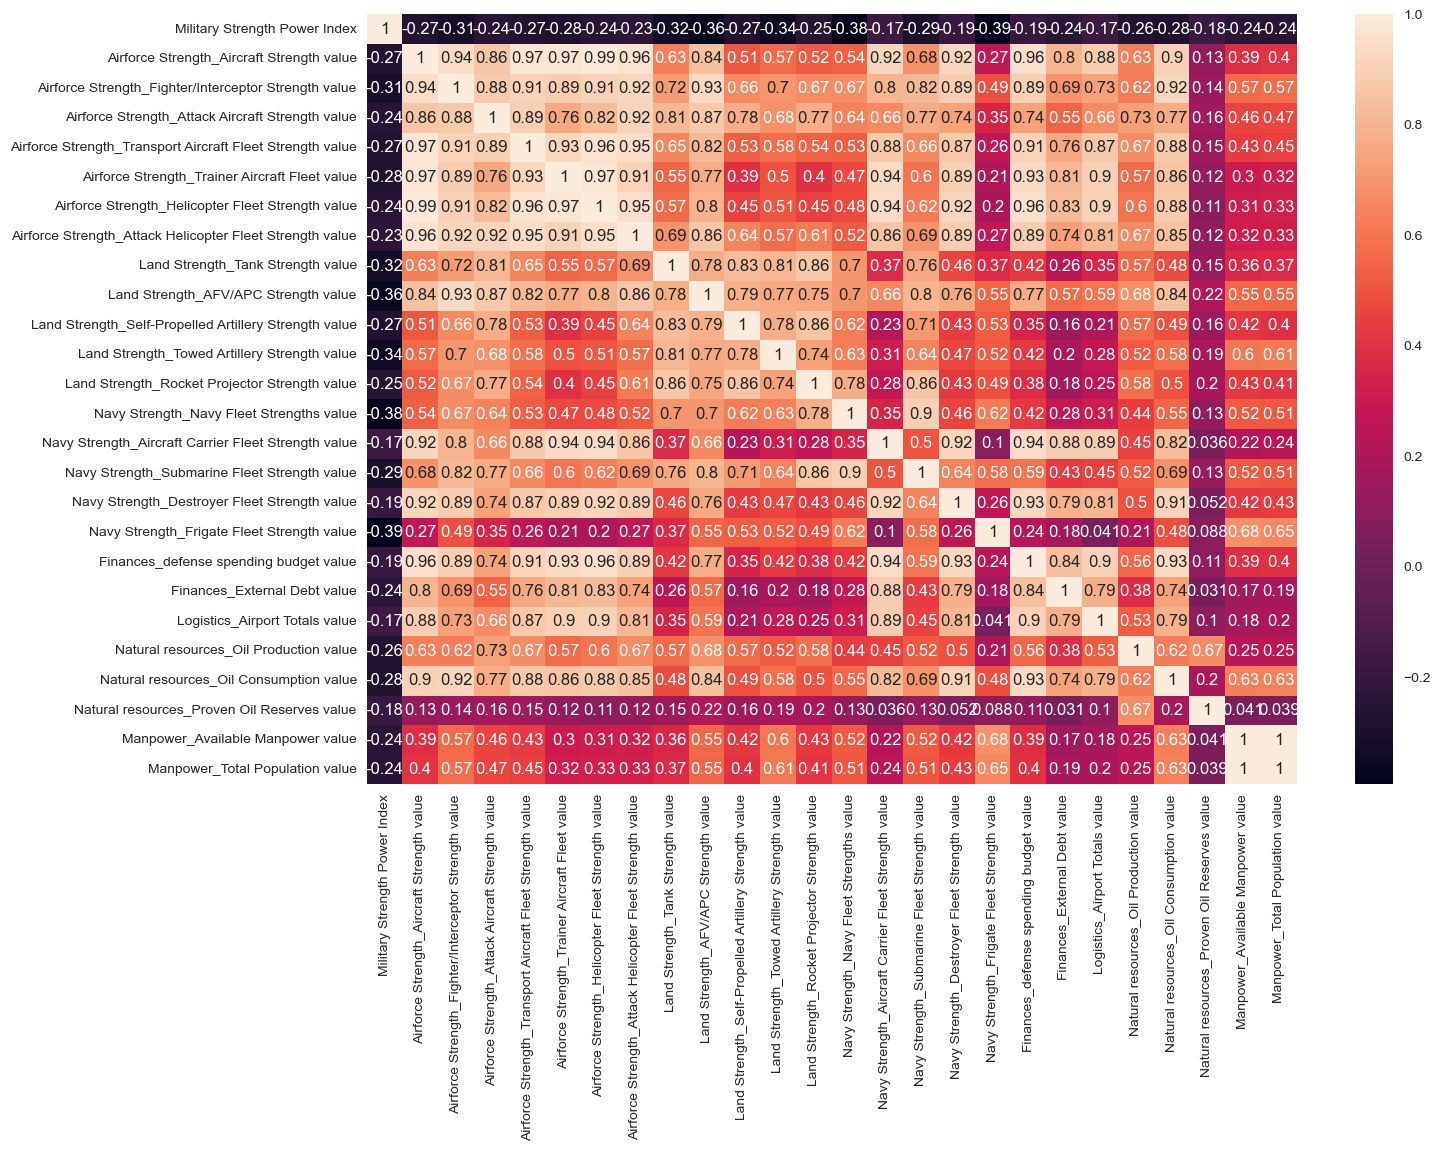

In [62]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True);

In [63]:
fig = px.imshow(df.corr(), width=1000, height=800)
fig.show()

# Data Preprocessing

In [64]:
X = df.drop(["country"], axis=1)

In [65]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Modelling

## Hopkins Test 

The Hopkins statistic tests the spatial randomness of your data. It answers the question: "Is my data randomly distributed, or does it tend to have clusters?"

The algorithm essentially works like this:
 1. It randomly selects a certain number (let's say n) of real data points from your dataset X. For each of these real data points, it finds the distance to its nearest neighbor in the remaining data. Let these distances be $u_1, u_2, ..., u_n$.
 2. It then generates the same number (n) of artificial random data points within the range of your original data. For each of these artificial points, it finds the distance to its nearest neighbor in the original data X. Let these distances be $w_1, w_2, ..., w_n$.
 3. The Hopkins statistic (H) is then calculated as: $H = \frac{\sum_{i=1}^{n} w_i}{\sum_{i=1}^{n} u_i + \sum_{i=1}^{n} w_i}$


Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.

In [66]:
hopkins(X, X.shape[0])

0.07526381381820849

## Clustering with K-means

### Elbow Method 
### We use this method to find optimal k value by looking up to break point of graph. 

In [67]:
ssd = [] # sum of squared distance

K = range(2,10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X)
    ssd.append(model.inertia_)
# Lower inertia generally indicates that the data points within each cluster are closer to their cluster's centroid. 
#This suggests that the clusters are more compact and internally similar. Ideally, you want clusters that are tightly grouped.

In [68]:
ssd

[1908.9606723107413,
 1293.9804803548773,
 1031.6387632601447,
 875.2328341966933,
 730.5805819091294,
 596.6149495076263,
 498.02807094870917,
 436.20439400715026]

Text(0.5, 1.0, 'elbow method')

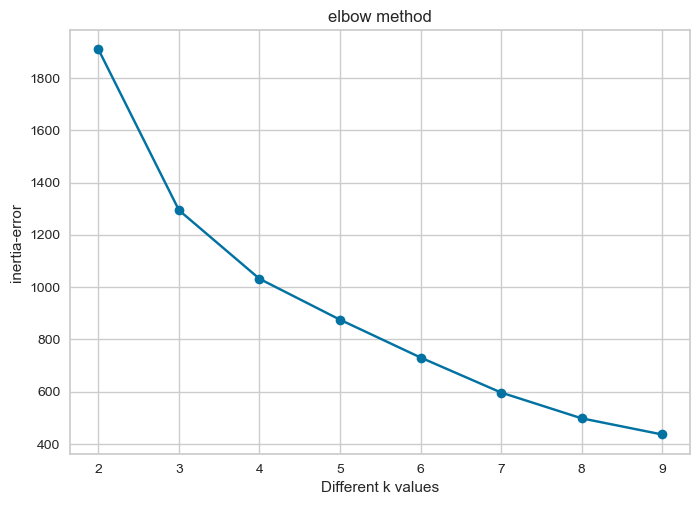

In [69]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method")

In [70]:
pd.Series(ssd).diff()

0           NaN
1   -614.980192
2   -262.341717
3   -156.405929
4   -144.652252
5   -133.965632
6    -98.586879
7    -61.823677
dtype: float64

In [71]:
df1_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df1_diff

,0
1,NaN
2,614.980192
3,262.341717
4,156.405929
5,144.652252
6,133.965632
7,98.586879
8,61.823677


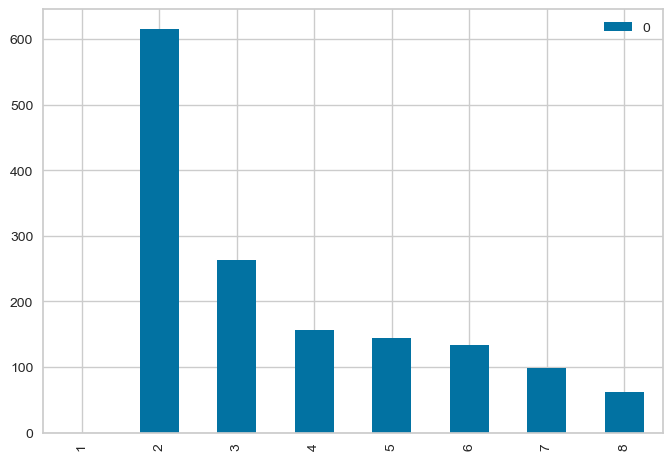

In [72]:
df1_diff.plot(kind='bar');

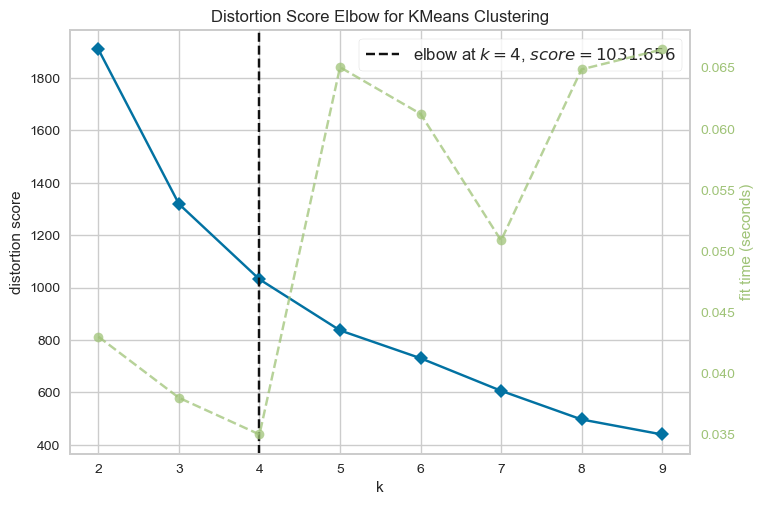

In [73]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(X)
visu.poof();

### Silhouette analysis


Silhouette analysis gives you a sense of how well each data point fits into its assigned cluster compared to other clusters, 
the more it closes to 1, the more It gives you a sense of how well each data point fits into its assigned cluster compared to other clusters.

In [74]:
silhouette_score(X, kmeans.labels_)

0.43592040738627186

In [75]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=101)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.8645343457024808
For n_clusters=3, the silhouette score is 0.8021734897138548
For n_clusters=4, the silhouette score is 0.6431108598819103
For n_clusters=5, the silhouette score is 0.4970990294193429
For n_clusters=6, the silhouette score is 0.5059656486613938
For n_clusters=7, the silhouette score is 0.4861811103301968
For n_clusters=8, the silhouette score is 0.4388025628710392


### Model Building and label visualisation

In [76]:
model = KMeans(n_clusters=3)
model.fit(X)

KMeans(n_clusters=3)

In [77]:
model.inertia_

1293.9804803548773

In [78]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0])

In [79]:
df["cluster"] = model.labels_ # label değerleri cluster sütunu olarak atıyoruz.

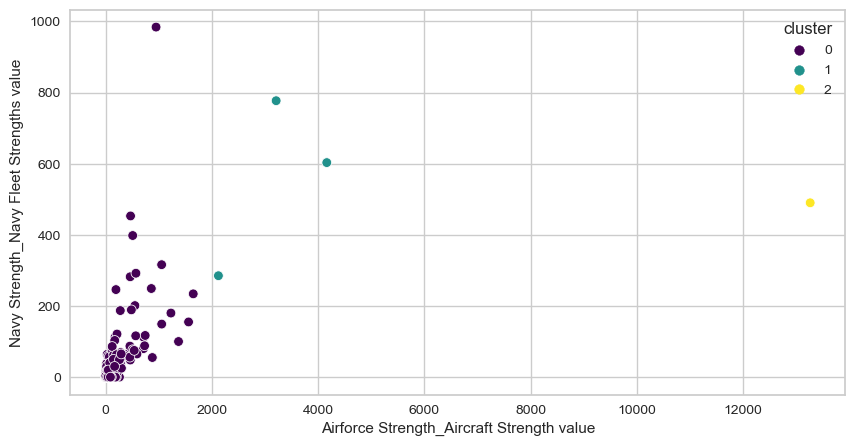

In [80]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,  # You need to pass your DataFrame using the 'data=' keyword
                x="Airforce Strength_Aircraft Strength value",
                y="Navy Strength_Navy Fleet Strengths value",
                hue="cluster",
                palette="viridis");

In [81]:
fig = px.scatter_3d(x=df["Airforce Strength_Aircraft Strength value"],
                   y=df["Finances_defense spending budget value"],
                   z=df["Finances_External Debt value"],
                   color=df.cluster,
                   labels = {"x": "Airforce Strength_Aircraft Strength value",
                             "y": "Finances_defense spending budget value",
                             "z": "Finances_External Debt value"},
                   hover_name=df["country"])

iplot(fig)

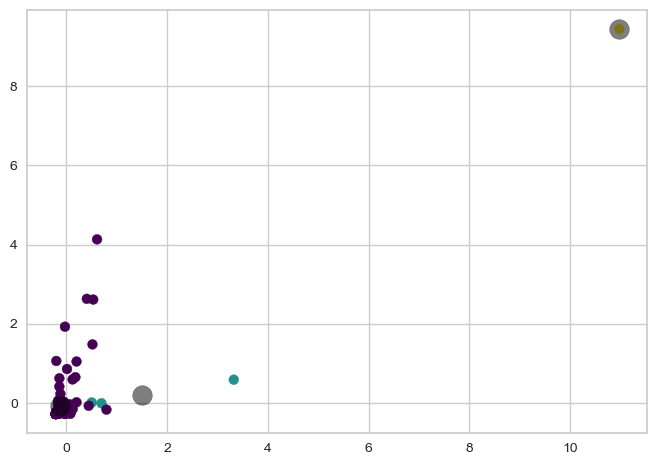

In [82]:
centroids = model.cluster_centers_

plt.scatter(X[:,18], X[:,19], c = df.cluster, s = 50, cmap = "viridis")
plt.scatter(centroids[:,18], centroids[:,19], c = "black", s = 200, alpha=0.5);

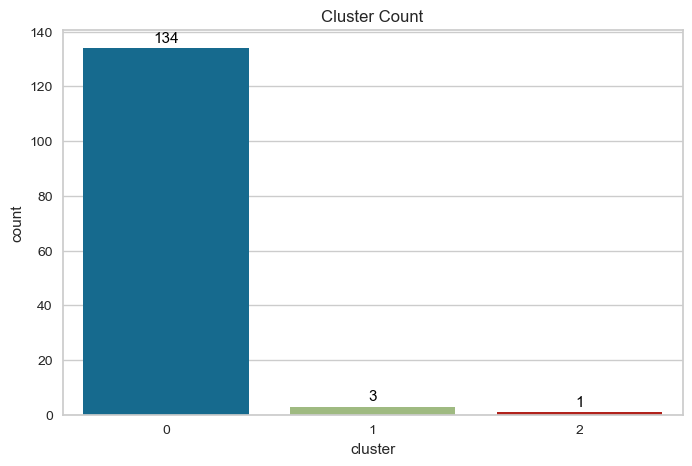

In [83]:
plt.figure(figsize=(8,5))
plt.title("Cluster Count")
ax1 = sns.countplot(x = df.cluster)

for p in ax1.patches:
    ax1.annotate(
        text=f"{p.get_height():1.0f}",  # Changed 's' to 'text'
        xy=(p.get_x() + p.get_width() / 2., p.get_height()),
        xycoords='data',
        ha='center',
        va='center',
        fontsize=11,
        color='black',
        xytext=(0,7),
        textcoords='offset points',
        clip_on=True
    )
plt.show()

In [84]:
df[df["cluster"] == 0]

,country,Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,cluster
0,Afghanistan,1.3444,260,0,25,30,0,187,0,0,1062,0,176,50,0.0,0.0,0.0,0.0,0.0,1.200000e+10,2.840000e+09,43,0.0,5500.0,0.000000e+00,14325743.0,34940837.0,0
1,Albania,2.3137,19,0,0,0,0,19,0,0,467,0,0,0,38.0,0.0,0.0,0.0,0.0,2.500000e+08,9.505000e+09,4,16000.0,42500.0,1.683000e+08,1519438.0,3057220.0,0
2,Algeria,0.4659,551,103,22,59,87,257,45,880,7361,320,240,316,201.0,0.0,6.0,0.0,5.0,1.300000e+10,6.260000e+09,157,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0,0
3,Angola,0.8379,295,72,18,30,47,126,15,379,595,28,357,115,57.0,0.0,0.0,0.0,0.0,7.000000e+09,4.208000e+10,176,1666000.0,82300.0,8.273000e+09,6244205.0,30355880.0,0
4,Argentina,0.6521,227,24,7,9,64,100,0,370,739,83,172,26,49.0,0.0,2.0,4.0,0.0,4.200000e+09,2.149000e+11,1138,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0,0
5,Armenia,2.1251,64,0,9,3,13,37,20,110,748,38,150,68,0.0,0.0,0.0,0.0,0.0,1.385000e+09,1.041000e+10,11,0.0,47500.0,0.000000e+00,1696085.0,3038217.0,0
6,Australia,0.3225,464,82,6,38,174,133,22,59,3051,0,54,0,48.0,2.0,6.0,2.0,8.0,2.630000e+10,1.714000e+12,480,263000.0,1005000.0,1.821000e+09,10808002.0,23470145.0,0
7,Austria,0.9568,120,15,0,11,32,62,0,56,467,33,0,0,0.0,0.0,0.0,0.0,0.0,3.380000e+09,6.308000e+11,52,14260.0,215000.0,4.300000e+07,4017691.0,8793370.0,0
8,Azerbaijan,0.9463,147,17,12,1,29,88,17,570,1451,187,227,162,31.0,0.0,4.0,0.0,1.0,2.805000e+09,1.741000e+10,37,789300.0,180000.0,7.000000e+09,5042346.0,10046516.0,0
9,Bahrain,1.8547,109,17,0,2,37,65,22,180,843,33,26,17,39.0,0.0,0.0,0.0,1.0,1.415000e+09,5.215000e+10,4,45000.0,55000.0,1.246000e+08,806505.0,1422659.0,0


In [85]:
df[df["cluster"] == 1]

,country,Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,cluster
26,China,0.0691,3210,1232,371,224,314,911,281,3500,33000,3800,3600,2650,777.0,2.0,74.0,36.0,52.0,2.370000e+11,1.598000e+12,507,3838000.0,13500000.0,2.562000e+10,752855402.0,1.384689e+09,1
49,India,0.0953,2123,538,172,250,359,722,23,4292,8686,235,4060,266,285.0,1.0,16.0,10.0,13.0,6.100000e+10,5.016000e+11,346,733900.0,5000000.0,4.621000e+09,622480340.0,1.296834e+09,1
101,Russia,0.0681,4163,873,742,424,497,1522,531,12950,27038,6083,4465,3860,603.0,1.0,62.0,16.0,10.0,4.800000e+10,5.396000e+11,1218,10580000.0,3225000.0,8.000000e+10,69640160.0,1.421228e+08,1


In [86]:
df[df["cluster"] == 2]

,country,Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,cluster
130,United States,0.0606,13264,2085,715,945,2643,5768,967,6289,39253,1465,2740,1366,490.0,20.0,66.0,91.0,0.0,7.500000e+11,1.791000e+13,13513,9352000.0,20000000.0,3.652000e+10,144872845.0,329256465.0,2


### Evaluate 

In [87]:
print(f'Silhouette Score(n=4): {silhouette_score(X, df.cluster)}') # towards to 1 means, data good clustered by model

Silhouette Score(n=4): 0.8194441293083203


In [88]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.8645343457024808
For n_clusters=3, the silhouette score is 0.8194441293083203
For n_clusters=4, the silhouette score is 0.4955821939029867
For n_clusters=5, the silhouette score is 0.5176044245264125
For n_clusters=6, the silhouette score is 0.4865589638170736
For n_clusters=7, the silhouette score is 0.4861811103301968
For n_clusters=8, the silhouette score is 0.4769827086899002


In [89]:
kmean = pd.DataFrame(X,columns=df.drop(["country","cluster"],axis=1).columns)
kmean["cluster"] = df["cluster"]

clus_pred_kmean = kmean.groupby("cluster").mean().T
clus_pred_kmean

cluster,0,1,2
Military Strength Power Index,0.031395,-1.048517,-1.061327
Airforce Strength_Aircraft Strength value,-0.128923,2.262191,10.489144
Airforce Strength_Fighter/Interceptor Strength value,-0.143139,3.483547,8.729991
Airforce Strength_Attack Aircraft Strength value,-0.150304,4.274269,7.317921
Airforce Strength_Transport Aircraft Fleet Strength value,-0.139695,2.925165,9.943640
Airforce Strength_Trainer Aircraft Fleet value,-0.108293,1.280236,10.670489
Airforce Strength_Helicopter Fleet Strength value,-0.119605,1.731833,10.831533
Airforce Strength_Attack Helicopter Fleet Strength value,-0.130788,2.605989,9.707636
Land Strength_Tank Strength value,-0.120813,4.150721,3.736804
Land Strength_AFV/APC Strength value,-0.135710,3.788287,6.820244


In [90]:
fig= px.line(clus_pred_kmean)
fig.show()

## Results

- Generally, Cluster 1 is in the best shape in terms of land, sea, and air power. However, it lags behind Cluster 2 in tank strength, self-propelled artillery, towed artillery, Rocket Projectors (Multiple-Launch Rocket Systems), and frigate-fleet strength.
- Cluster o from every perspective is the weakest one.

## Hierarchical Clustering

In [91]:
from scipy.cluster.hierarchy import dendrogram, linkage
# yeni bir data geldiğinde direkt predict yapamayız, datanın içine atarak işlem yapmalıyız.

### Dendogram

In [92]:
hc_ward = linkage(y = X, method = "ward") # eklendiği sınıfın varyansını düşürecek şekile ata
hc_complete = linkage(X, "complete") # en uzak noktaya göre en küçük değer
hc_average = linkage(X, "average")  # ortalama
hc_single = linkage(X, "single") #en yakın noktaya göre en küçük değer

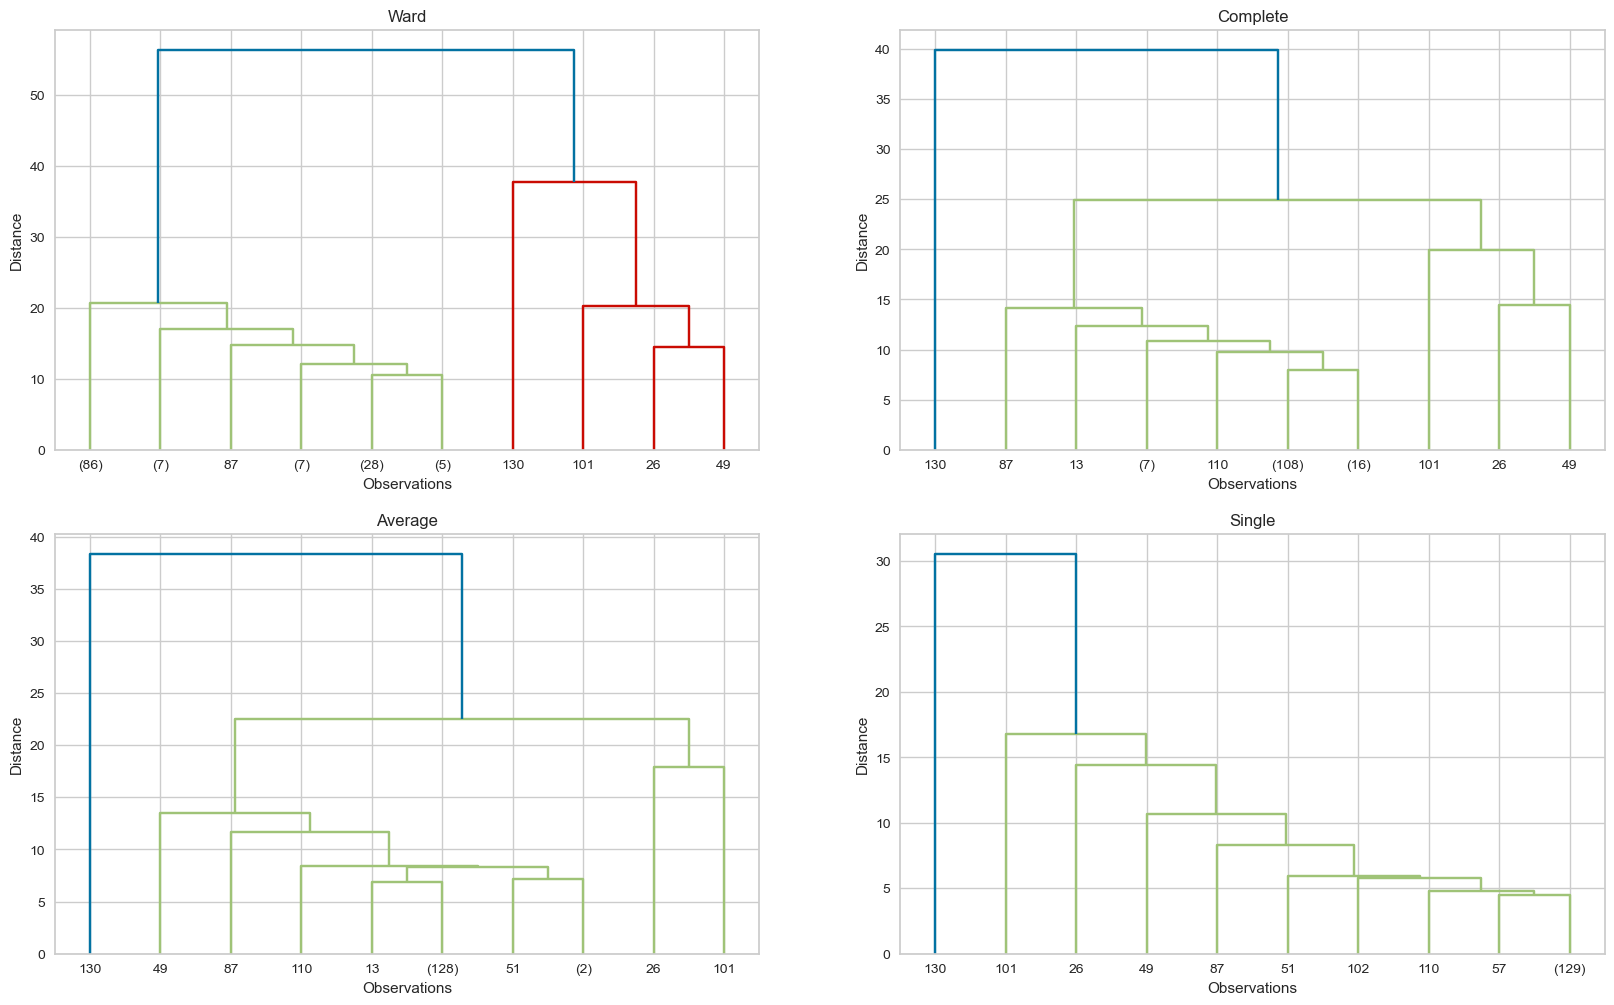

In [93]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

### Model Building and label visualisation

In [94]:
from sklearn.cluster import AgglomerativeClustering
# elbow yapılmıyor

In [95]:
model1 = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage = "ward")
model1.fit_predict(X)

array([3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3,
       1, 3, 3, 1, 0, 1, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 1,
       3, 1, 3, 3, 3, 0, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 1, 3, 3, 3, 3, 1,
       3, 3, 3, 1, 3, 3, 1, 3, 1, 1, 3, 3, 1, 0, 1, 3, 3, 1, 3, 3, 3, 1,
       1, 3, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 1, 1, 1, 2, 3,
       3, 1, 1, 3, 3, 3], dtype=int64)

In [96]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.8645343457024808
For n_clusters=3, the silhouette score is 0.8194441293083203
For n_clusters=4, the silhouette score is 0.4955821939029867
For n_clusters=5, the silhouette score is 0.5176044245264125
For n_clusters=6, the silhouette score is 0.4865589638170736
For n_clusters=7, the silhouette score is 0.4861811103301968
For n_clusters=8, the silhouette score is 0.4769827086899002


In [97]:
df["cluster_1"] = model1.labels_

In [98]:
fig = px.scatter_3d(x=df["Airforce Strength_Aircraft Strength value"],
                   y=df["Finances_defense spending budget value"],
                   z=df["Finances_External Debt value"],
                   color=df.cluster_1,
                   labels = {"x": "Airforce Strength_Aircraft Strength value",
                             "y": "Finances_defense spending budget value",
                             "z": "Finances_External Debt value"},
                   hover_name=df["country"])

iplot(fig)

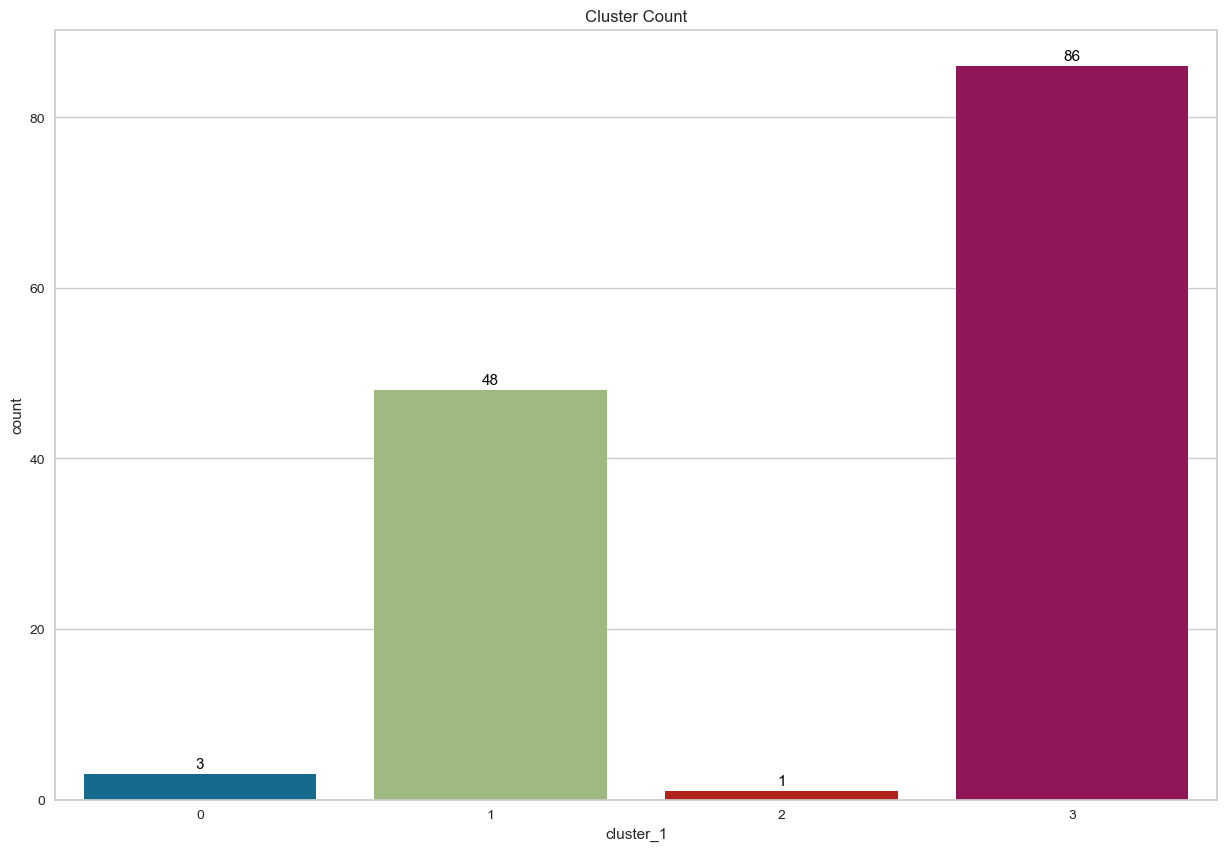

In [99]:
plt.figure(figsize=(15,10))
plt.title("Cluster Count")
ax1 = sns.countplot(x = df.cluster_1)

for p in ax1.patches:
    ax1.annotate(
        text=f"{p.get_height():1.0f}",
        xy=(p.get_x() + p.get_width() / 2., p.get_height()), 
        xycoords='data',
        ha='center', 
        va='center', 
        fontsize=11, 
        color='black',
        xytext=(0,7), 
        textcoords='offset points',
        clip_on=True,                   
    )
plt.show();

In [100]:
dend = pd.DataFrame(X,columns=df.drop(["country","cluster","cluster_1"],axis=1).columns)
dend["cluster"] = df["cluster_1"]

clus_pred_dend = dend.groupby("cluster").mean().T
clus_pred_dend

cluster,0,1,2,3
Military Strength Power Index,-1.048517,-0.711592,-1.061327,0.446085
Airforce Strength_Aircraft Strength value,2.262191,0.106319,10.489144,-0.260221
Airforce Strength_Fighter/Interceptor Strength value,3.483547,0.147145,8.729991,-0.305158
Airforce Strength_Attack Aircraft Strength value,4.274269,-0.010290,7.317921,-0.228451
Airforce Strength_Transport Aircraft Fleet Strength value,2.925165,0.066550,9.943640,-0.254809
Airforce Strength_Trainer Aircraft Fleet value,1.280236,0.205008,10.670489,-0.283158
Airforce Strength_Helicopter Fleet Strength value,1.731833,0.091199,10.831533,-0.237263
Airforce Strength_Attack Helicopter Fleet Strength value,2.605989,0.039334,9.707636,-0.225740
Land Strength_Tank Strength value,4.150721,0.256544,3.736804,-0.331431
Land Strength_AFV/APC Strength value,3.788287,0.290596,6.820244,-0.373648


In [101]:
fig= px.line(clus_pred_dend)
fig.show()

## Results

- Generally, Cluster 2 is in the best shape in terms of land, sea, and air power. However, it lags behind Cluster 0 in tank strength, self-propelled artillery, towed artillery, Rocket Projectors (Multiple-Launch Rocket Systems), and frigate-fleet strength.
- Cluster 3 from every perspective is the weakest one.

In [102]:
df[df["cluster_1"] == 0]

,country,Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,cluster,cluster_1
26,China,0.0691,3210,1232,371,224,314,911,281,3500,33000,3800,3600,2650,777.0,2.0,74.0,36.0,52.0,2.370000e+11,1.598000e+12,507,3838000.0,13500000.0,2.562000e+10,752855402.0,1.384689e+09,1,0
49,India,0.0953,2123,538,172,250,359,722,23,4292,8686,235,4060,266,285.0,1.0,16.0,10.0,13.0,6.100000e+10,5.016000e+11,346,733900.0,5000000.0,4.621000e+09,622480340.0,1.296834e+09,1,0
101,Russia,0.0681,4163,873,742,424,497,1522,531,12950,27038,6083,4465,3860,603.0,1.0,62.0,16.0,10.0,4.800000e+10,5.396000e+11,1218,10580000.0,3225000.0,8.000000e+10,69640160.0,1.421228e+08,1,0


In [103]:
df[df["cluster_1"] == 1]

,country,Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,cluster,cluster_1
2,Algeria,0.4659,551,103,22,59,87,257,45,880,7361,320,240,316,201.0,0.0,6.0,0.0,5.0,1.300000e+10,6.260000e+09,157,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0,0,1
6,Australia,0.3225,464,82,6,38,174,133,22,59,3051,0,54,0,48.0,2.0,6.0,2.0,8.0,2.630000e+10,1.714000e+12,480,263000.0,1005000.0,1.821000e+09,10808002.0,23470145.0,0,1
10,Bangladesh,0.7066,177,44,0,11,57,67,0,276,1230,18,419,72,112.0,0.0,2.0,0.0,8.0,3.800000e+09,5.026000e+10,18,3666.0,112000.0,2.800000e+07,78913289.0,159453001.0,0,1
11,Belarus,0.8179,202,39,68,4,28,63,21,532,1560,482,228,238,0.0,0.0,0.0,0.0,0.0,6.237028e+08,3.992000e+10,65,32000.0,190000.0,1.980000e+08,4982905.0,9527543.0,0,1
17,Brazil,0.1988,715,43,78,126,198,242,12,437,1820,132,565,84,112.0,0.0,6.0,0.0,7.0,2.780000e+10,5.474000e+11,4093,2622000.0,3020000.0,1.300000e+10,107764996.0,208846892.0,0,1
18,Bulgaria,0.8916,63,13,4,5,20,25,2,710,2000,506,350,192,29.0,0.0,0.0,0.0,4.0,1.079000e+09,4.206000e+10,68,1000.0,115000.0,1.500000e+07,3278916.0,7057504.0,0,1
22,Canada,0.3712,385,62,0,38,135,145,0,80,1973,0,133,0,64.0,0.0,4.0,0.0,12.0,2.250000e+10,1.608000e+12,1467,3977000.0,2500000.0,1.697000e+11,16110865.0,35881659.0,0,1
25,Chile,0.7668,282,44,0,30,93,92,0,300,1430,48,158,10,69.0,0.0,4.0,0.0,10.0,4.250000e+09,1.834000e+11,481,3244.0,325000.0,1.500000e+08,8657902.0,17925262.0,0,1
27,Colombia,0.6045,469,21,38,76,80,224,0,0,595,6,110,0,453.0,0.0,11.0,0.0,4.0,1.060000e+10,1.246000e+11,836,853600.0,300000.0,2.002000e+09,24084498.0,48168996.0,0,1
32,Denmark,0.7878,113,33,0,4,38,35,0,57,972,22,0,0,74.0,0.0,0.0,0.0,9.0,4.760000e+09,4.848000e+11,80,137100.0,162000.0,4.906000e+08,2590457.0,5809502.0,0,1


In [104]:
df[df["cluster_1"] == 2]

,country,Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,cluster,cluster_1
130,United States,0.0606,13264,2085,715,945,2643,5768,967,6289,39253,1465,2740,1366,490.0,20.0,66.0,91.0,0.0,7.500000e+11,1.791000e+13,13513,9352000.0,20000000.0,3.652000e+10,144872845.0,329256465.0,2,2


In [105]:
df[df["cluster_1"] == 3]

,country,Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,cluster,cluster_1
0,Afghanistan,1.3444,260,0,25,30,0,187,0,0,1062,0,176,50,0.0,0.0,0.0,0.0,0.0,1.200000e+10,2.840000e+09,43,0.0,5500.0,0.000000e+00,14325743.0,34940837.0,0,3
1,Albania,2.3137,19,0,0,0,0,19,0,0,467,0,0,0,38.0,0.0,0.0,0.0,0.0,2.500000e+08,9.505000e+09,4,16000.0,42500.0,1.683000e+08,1519438.0,3057220.0,0,3
3,Angola,0.8379,295,72,18,30,47,126,15,379,595,28,357,115,57.0,0.0,0.0,0.0,0.0,7.000000e+09,4.208000e+10,176,1666000.0,82300.0,8.273000e+09,6244205.0,30355880.0,0,3
4,Argentina,0.6521,227,24,7,9,64,100,0,370,739,83,172,26,49.0,0.0,2.0,4.0,0.0,4.200000e+09,2.149000e+11,1138,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0,0,3
5,Armenia,2.1251,64,0,9,3,13,37,20,110,748,38,150,68,0.0,0.0,0.0,0.0,0.0,1.385000e+09,1.041000e+10,11,0.0,47500.0,0.000000e+00,1696085.0,3038217.0,0,3
7,Austria,0.9568,120,15,0,11,32,62,0,56,467,33,0,0,0.0,0.0,0.0,0.0,0.0,3.380000e+09,6.308000e+11,52,14260.0,215000.0,4.300000e+07,4017691.0,8793370.0,0,3
8,Azerbaijan,0.9463,147,17,12,1,29,88,17,570,1451,187,227,162,31.0,0.0,4.0,0.0,1.0,2.805000e+09,1.741000e+10,37,789300.0,180000.0,7.000000e+09,5042346.0,10046516.0,0,3
9,Bahrain,1.8547,109,17,0,2,37,65,22,180,843,33,26,17,39.0,0.0,0.0,0.0,1.0,1.415000e+09,5.215000e+10,4,45000.0,55000.0,1.246000e+08,806505.0,1422659.0,0,3
12,Belgium,1.0499,148,43,0,12,64,29,0,0,984,0,0,0,17.0,0.0,0.0,0.0,2.0,4.921000e+09,1.281000e+12,41,0.0,645000.0,0.000000e+00,4833107.0,11570762.0,0,3
13,Bhutan,10.1681,2,0,0,0,0,2,0,0,27,0,0,0,0.0,0.0,0.0,0.0,0.0,2.512000e+07,2.671000e+09,2,0.0,2000.0,0.000000e+00,176808.0,766397.0,0,3


# REFERENCES

 - https://www.machinelearningplus.com/machine-learning/exploratory-data-analysis-eda/
 - https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/
 - https://www.javatpoint.com/data-visualization-in-machine-learning
 - https://www.upgrad.com/blog/data-preprocessing-in-machine-learning/
 - https://www.geeksforgeeks.org/clustering-in-machine-learning/
 - https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35
 - https://stats.stackexchange.com/questions/332651/validating-cluster-tendency-using-hopkins-statistic
 - https://medium.com/@mudgalvivek2911/machine-learning-clustering-elbow-method-4e8c2b404a5d
 - https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1
 - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
 - https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/